<a href="https://colab.research.google.com/github/Mike030668/team-UII/blob/main/%D0%9D%D0%BE%D1%83%D1%82_%D0%B4%D0%BB%D1%8F_%D0%B2%D1%8B%D1%80%D0%B5%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BB%D0%B8%D1%86_%D0%B4%D0%BB%D1%8F_%D0%B1%D0%B0%D0%B7%D1%8B_%D0%9E%D1%82%D0%B1%D0%BE%D1%80_%D0%B2_%D0%BA%D0%BE%D0%BC%D0%B0%D0%BD%D0%B4%D1%83_%D0%A3%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

In [28]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont # Модули работы с изображениями

In [ ]:
image_path = '/content/drive/MyDrive/Colab Bases/Команда УИИ/Test Kerry/'+idx
image_base = cv2.imread(image_path)
image = cv2.imread(image_path)

Лиц обнаружено: 1


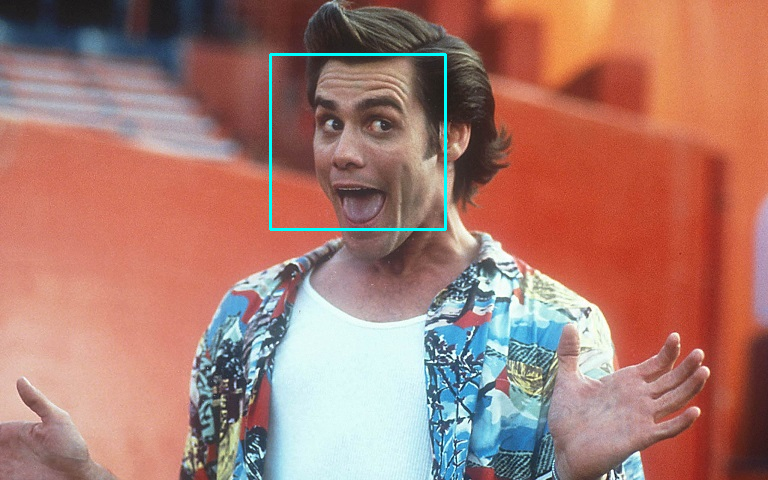

True

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow



path = os.path.join(cv2.data.haarcascades, 'haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier( path )

idx = np.random.choice(frameID)

image_path = '/content/drive/MyDrive/Colab Bases/Команда УИИ/Test Kerry/'+idx
image_base = cv2.imread(image_path)
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor= 1.1,
    minNeighbors= 5,
    minSize=(10, 10)
)
faces_detected = "Лиц обнаружено: " + format(len(faces))
print(faces_detected)
# Рисуем квадраты вокруг лиц
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
cv2_imshow(image)

#cv2_imshow(image_base[y:y+h,x:x+w,:])
path_save = '/content/drive/MyDrive/Colab Bases/Команда УИИ/Face_Kerry/' + idx

face_np = image_base[y:y+h,x:x+w,:]

face_img = Image.fromarray(face_np) #cv2_imshow(face_np) # cv2.imwrite(face_np) #path_save)#
face_img = face_img.resize((216, 216)) 
face_np = np.array(face_img)
cv2.imwrite(path_save, face_np)##


# Вырезания лиц для создания контрольной базы лиц

In [27]:
import cv2
import os
from google.colab.patches import cv2_imshow

path = os.path.join(cv2.data.haarcascades, 'haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier( path )

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import time
path_test_video = '/content/drive/MyDrive/Colab Bases/Команда УИИ/Shou_Trumana_Kinosimka.RU (online-video-cutter.com).mp4'
cap = cv2.VideoCapture(path_test_video)

start = time.time()

np_cutfilm = []
all_persons = []
cadr = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
      break

    if cadr%2== 0:
      image_base = frame
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      faces = face_cascade.detectMultiScale(
          gray,
          scaleFactor= 1.1,
          minNeighbors= 5,
          minSize=(10, 10)
      )

      # Рисуем квадраты вокруг лиц
      for i,(x, y, w, h) in enumerate(faces):
          cv2.rectangle(faces, (x, y), (x+w, y+h), (255, 255, 0), 2)

          path_save = '/content/drive/MyDrive/Colab Bases/Команда УИИ/Face_Kerry/' + str(cadr)+'_'+str(i) + '.jpg'

          face_np = image_base[y:y+h,x:x+w,:]

          face_img = Image.fromarray(face_np) #cv2_imshow(face_np) # cv2.imwrite(face_np) #path_save)#
          face_img = face_img.resize((128, 128)) 
          face_np = np.array(face_img)
          cv2.imwrite(path_save, face_np)##
    cadr+=1
          
    cv2.waitKey(1) & 0xFF

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

finish = time.time() - start
print('время обработки', finish)


время обработки 1655.3092737197876


# Загрузка отобранной базы контрольных лиц

In [24]:
# Глобальные параметры
img_width = 128 # Ширина уменьшенной картинки 
img_height = 128 # Высота уменьшенной картинки 

directory = '/content/drive/MyDrive/Colab Bases/Команда УИИ/Face_Kerry/' # Указываем путь к обучающей выборке с оригинальными изображения


In [29]:
import time
from tensorflow.keras.preprocessing import image # Импортируем модуль image для работы с изображениями
cur_time = time.time() # Засекаем текущее время
train_images = []
for filename in sorted(os.listdir(directory)): # Проходим по всем файлам в каталоге по указанному пути     
    train_images.append(image.load_img(os.path.join(directory,filename), color_mode='rgb',
                                          target_size=(img_width, img_height))) # Читаем очередную картинку и добавляем ее в список изображения с указанным target_size           
print ('Выборка загржена. Время загрузки: ', round(time.time() - cur_time, 2), 'c', sep='') # Отображаем время загрузки картинок проверочной выборки
                                                                               

Выборка загржена. Время загрузки: 862.73c


In [30]:
len(train_images)

3349

In [31]:
data = []
for img in train_images:
    x = image.img_to_array(img) # Переводим изображение в numpy-массив размерностью: высота - ширина - количество каналов
    data.append(x) # Добавляем очередной элемент в xTrain

x_data = np.array(data) # Переводим в numpy
x_data = x_data / 255. # Трансофрмируем значение в диапазон от -1 до 1
x_data.shape

(3349, 128, 128, 3)

In [32]:
np.save('/content/drive/MyDrive/Colab Bases/Команда УИИ/control_faces_big.npy',x_data)

In [33]:
from sklearn.model_selection import train_test_split #Разбиение на обучающую и проверочную выборку
xTrain, xVal = train_test_split(x_data, test_size=0.2)

# Загрузка массива контрольных лиц с HTML

In [3]:
import gdown
file_id = '1n-HZ_8jsYpBH8BJGpDSeLIEKRc3vAhSQ'
gdown.download('https://drive.google.com/uc?id=' + file_id, 'control_faces.h5', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1n-HZ_8jsYpBH8BJGpDSeLIEKRc3vAhSQ
To: /content/control_faces.h5
730MB [00:04, 152MB/s]


'control_faces.h5'

In [4]:
control_faces = np.load('/content/control_faces.h5')
control_faces.shape

(3714, 128, 128, 3)

In [5]:
from sklearn.model_selection import train_test_split #Разбиение на обучающую и проверочную выборку
xTrain, xVal = train_test_split(control_faces, test_size=0.2)

#Собираем модель АС

In [36]:
from tensorflow.keras.models import Sequential, Model  # грузим сеть прямого распространения
#базовые слои сверточных сетей
from tensorflow.keras.layers import UpSampling2D, Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dropout
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator #модуль для работы с изображениями
from tensorflow.keras.optimizers import Adam, Adamax, Adadelta # оптимизаторы
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping   # подключаем колбэки

from tensorflow.keras.utils import plot_model #модуль отрисоки структуры нейронки
from tensorflow.keras import utils # метод для to_catagorical
import matplotlib.pyplot as plt # Отображение графиков

In [37]:
def model_A(shape=(128,128,3)): # зададим функцию создания базового автокодировщика
    img_input = Input((shape)) # задаём входные размеры

    A = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) # входные данные передаем на слой двумерной свёртки и получаем (112,80,32)
    A = BatchNormalization()(A) # затем пропускаем через слой нормализации данных 
    A = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(A) #(110,78,32) (in_size + 2 * padding_size-filter_size) / stride + 1) 
    A = BatchNormalization()(A) # и еще слой нормализации данных
    A = Conv2D(32, (2, 2), strides=(2, 2), padding='valid', activation='relu')(A) #(55,39,32) (in_size + 2 * padding_size-filter_size) / stride + 1) 
    A = BatchNormalization()(A) # и еще слой нормализации данных

    out_1 = Conv2D(32, (1, 1), strides=(2, 2), padding='same', activation='relu')(A) #(28,20,32) (in_size + 2 * padding_size-filter_size) / stride + 1) 
    #print(out_1.shape)
    Z = Flatten()(out_1)
    #print(Z.shape)
    out_2 = Dense(100, activation='sigmoid')(Z)
    #print(out_2.shape)
    up = Dense(32768, activation='relu')(out_2)
    up = Reshape((32,32,32))(up)
    up = Conv2D(32, (1, 1),  padding='same', activation='relu')(up)
    out_1 = out_1 + up
    model = Model(img_input, [out_1, out_2]) 
    return model # функция вернёт заданную модель
 

In [38]:
img_width, img_height, chanels = (128, 128, 3)
main_model = model_A((img_width, img_height,chanels))

In [10]:
main_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 9248        batch_normalization[0][0]        
______________________________________________________________________________________________

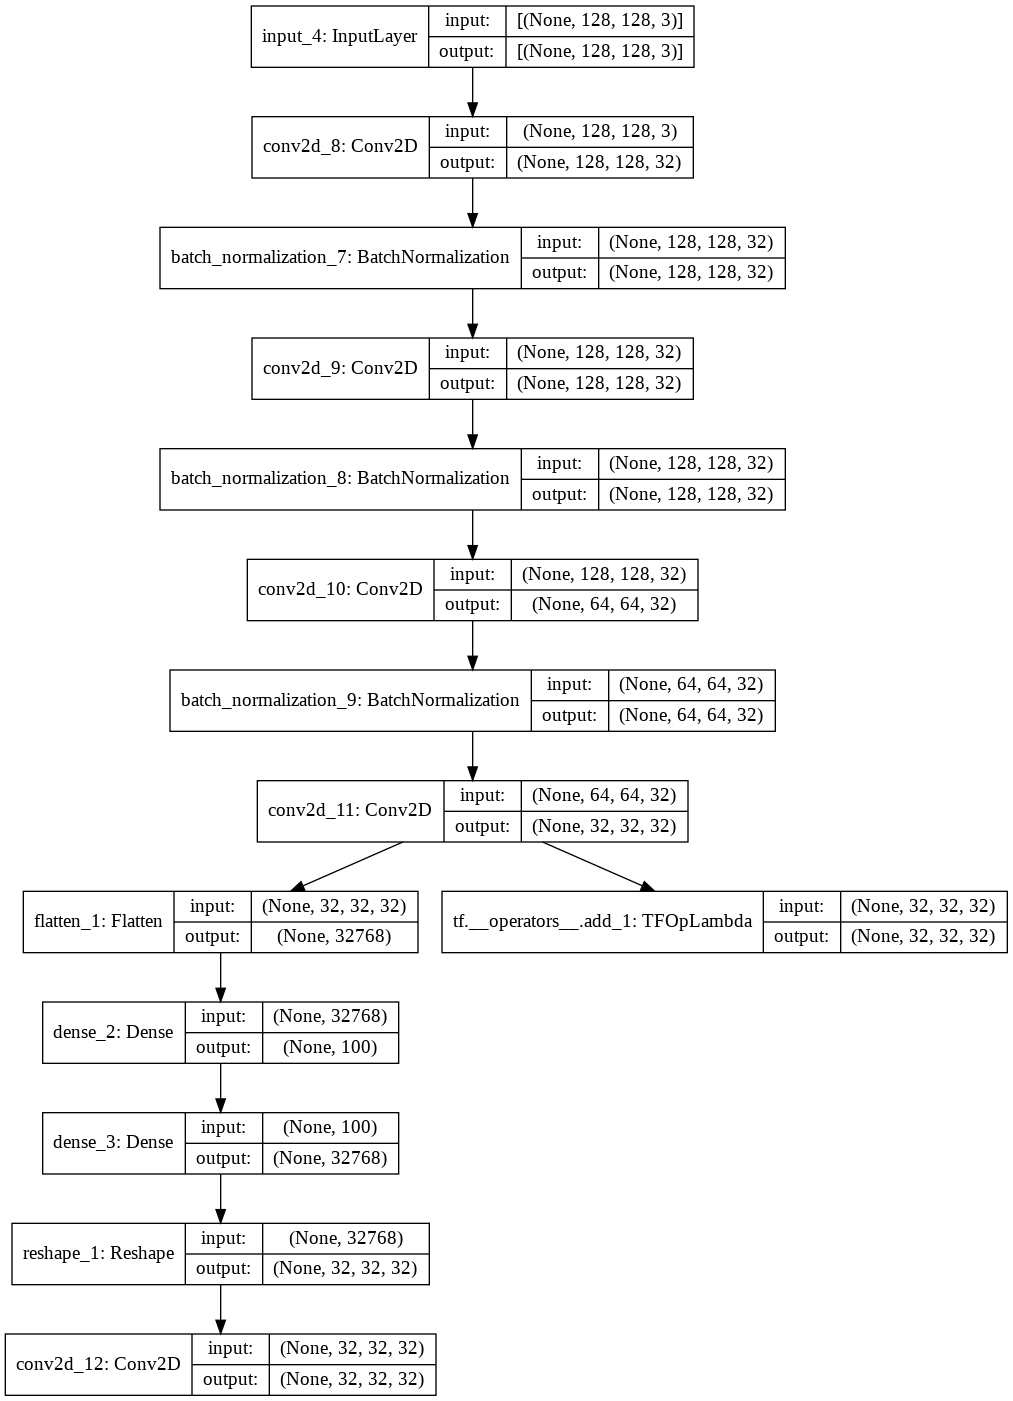

In [39]:
plot_model(main_model, show_shapes=True)

In [40]:
def model_B(shape=(32,32,32)): # зададим функцию создания базового автокодировщика
    img_input = Input((shape)) # задаём входные размеры
    E = Conv2DTranspose(64, kernel_size=(2, 2), strides=(2, 2), padding='same', activation='relu')(img_input) # слой разжимает данные с (28*20 на 56*40, 64)
    E = BatchNormalization()(E) # слой нормализации данных
    E = Conv2D(64, (3, 3), padding='same', activation='relu')(E) # передаем на слой двумерной свёртки (56*40, 40)
    E = BatchNormalization()(E) # слой нормализации данных
    E = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='valid', activation='relu')(E) # слой разжимает данные (с 56*40 на 112*80, 64)
    E = BatchNormalization()(E) # слой нормализации данных
    E = Conv2D(32, (3, 3), padding='same', activation='relu')(E) # ещё слой двумерной свёртки (112, 80 , 64)
    E = BatchNormalization()(E) # слой нормализации данных

    # Финальный слой двумерной свертки, выдающий итоговое изображение
    X = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(E)  #(112, 80, 1)

    model = Model(img_input, X) # указываем модель, с оригинальным изображением на входе в сеть и сжатым-разжатым на выходе из сети

    return model # функция вернёт заданную модель

In [41]:
add_model = model_B((32,32,32))

In [42]:
add_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 32)]      0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 64)        8256      
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_11 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 128, 128, 64)      16448     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128, 128, 64)      256 

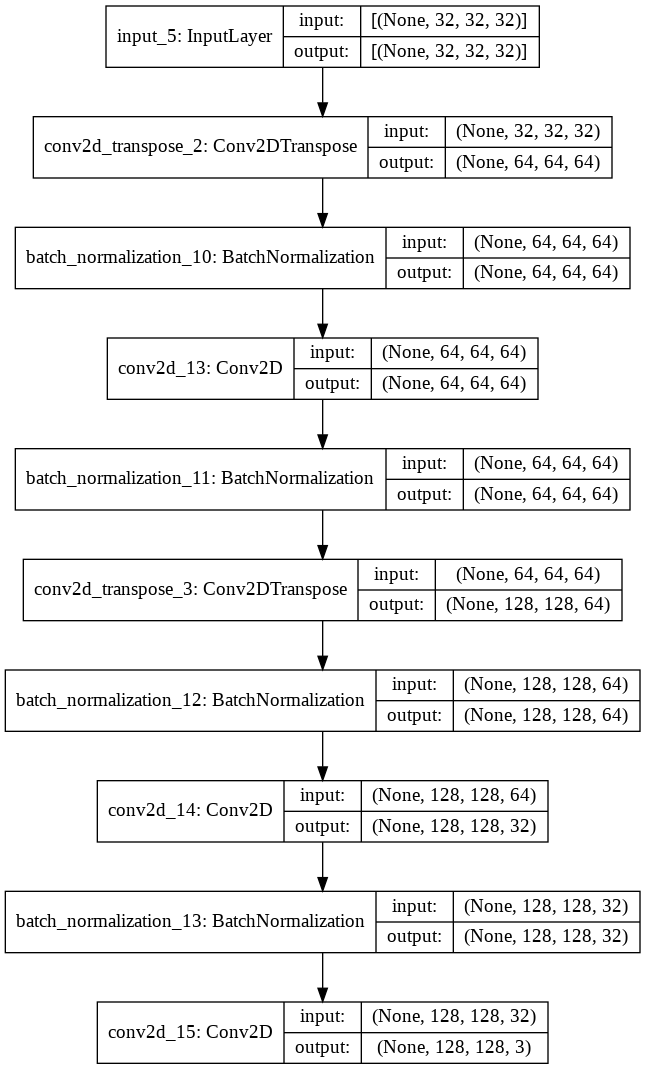

In [43]:
plot_model(add_model, show_shapes=True)

In [44]:
input_img = Input(shape=(img_width,img_height,chanels)) # Создаем слой Input 
space_in = main_model(input_img)[0]
out_img = add_model(space_in)
train_model = Model(input_img, out_img)

In [45]:
train_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
model_3 (Functional)         [(None, 32, 32, 32), (Non 6603236   
_________________________________________________________________
model_4 (Functional)         (None, 128, 128, 3)       81859     
Total params: 6,685,095
Trainable params: 6,684,455
Non-trainable params: 640
_________________________________________________________________


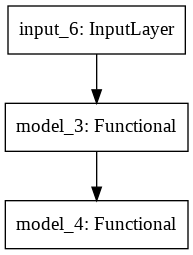

In [46]:
plot_model(train_model)

In [49]:
import gdown
from keras.models import load_model 

file_id = '1-0Mn11PvKobLGOhSno7iAOIUxE4HDNRO'
gdown.download('https://drive.google.com/uc?id=' + file_id, 'weights_modelAC.h5', quiet=False)

#train_model = load_model('/content/model5.h5')


Downloading...
From: https://drive.google.com/uc?id=1-0Mn11PvKobLGOhSno7iAOIUxE4HDNRO
To: /content/weights_modelAC.h5
26.8MB [00:00, 162MB/s]


'weights_modelAC.h5'

In [50]:
train_model.load_weights('/content/weights_modelAC.h5')

In [55]:
xTrain[1].shape


(128, 128, 3)

In [59]:
main_model.predict(xTrain[:2])[0].shape

(2, 32, 32, 32)

In [60]:
train_model.save('/content/drive/MyDrive/Colab Bases/Команда УИИ/main_model.h5')
train_model.save_weights('/content/drive/MyDrive/Colab Bases/Команда УИИ/weights_main_model.h5')

# Fit() моделей

In [19]:
 train_model.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['accuracy']) # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [20]:
epochs = 15  # число эпох для обучения
patienceStop = round(epochs/5)  #через сколько эпох остановим обучение, если нет развития
patienceReduce = round(epochs/25) #через сколько эпох понизим lr (шаг обучения)
# функция для колбека по понижению lr
reduce_lr = ReduceLROnPlateau(verbose=1, monitor='val_loss',patience=patienceReduce,min_lr=0.000001,factor=0.3)
# функция для остановки обучения и сохранения лучших весов
earlystopper = EarlyStopping(patience=patienceStop, verbose=1, monitor='val_loss',restore_best_weights=True)

In [21]:
#обучаем сеть
result = train_model.fit(xTrain, xTrain,
                   batch_size=128,
                   epochs = epochs,
                   validation_data=(xVal, xVal),
                   verbose=1,
                   callbacks=[reduce_lr, earlystopper]) # добавляем наши колбеки

Epoch 1/15
24/24 [==============================] - 681s 28s/step - loss: 0.1026 - accuracy: 0.3970 - val_loss: 0.0801 - val_accuracy: 0.9483
Epoch 2/15
24/24 [==============================] - 614s 26s/step - loss: 0.0637 - accuracy: 0.5211 - val_loss: 0.0669 - val_accuracy: 0.9482
Epoch 3/15
24/24 [==============================] - 617s 26s/step - loss: 0.0477 - accuracy: 0.6380 - val_loss: 0.0540 - val_accuracy: 0.9583
Epoch 4/15
24/24 [==============================] - 617s 26s/step - loss: 0.0384 - accuracy: 0.7206 - val_loss: 0.0437 - val_accuracy: 0.9588
Epoch 5/15
24/24 [==============================] - 618s 26s/step - loss: 0.0318 - accuracy: 0.7611 - val_loss: 0.0362 - val_accuracy: 0.9604
Epoch 6/15
24/24 [==============================] - 620s 26s/step - loss: 0.0268 - accuracy: 0.7901 - val_loss: 0.0316 - val_accuracy: 0.9610
Epoch 7/15
24/24 [==============================] - 657s 27s/step - loss: 0.0229 - accuracy: 0.8054 - val_loss: 0.0281 - val_accuracy: 0.9613
Epoch 

In [34]:
#обучаем сеть
result = train_model.fit(xTrain, xTrain,
                   batch_size=64,
                   epochs = epochs,
                   validation_data=(xVal, xVal),
                   verbose=1,
                   callbacks=[reduce_lr, earlystopper]) # добавляем наши колбеки

Epoch 1/15
42/42 [==============================] - 569s 14s/step - loss: 0.0033 - accuracy: 0.9342 - val_loss: 0.0023 - val_accuracy: 0.9535
Epoch 2/15
42/42 [==============================] - 573s 14s/step - loss: 0.0032 - accuracy: 0.9334 - val_loss: 0.0026 - val_accuracy: 0.9498

Epoch 00002: ReduceLROnPlateau reducing learning rate to 1e-06.
Epoch 3/15
42/42 [==============================] - 608s 15s/step - loss: 0.0033 - accuracy: 0.9329 - val_loss: 0.0027 - val_accuracy: 0.9464
Epoch 4/15
42/42 [==============================] - 600s 14s/step - loss: 0.0033 - accuracy: 0.9335 - val_loss: 0.0029 - val_accuracy: 0.9433
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


In [35]:
train_model.save('/content/drive/MyDrive/Colab Bases/Команда УИИ/model_AC_3.h5')
train_model.save_weights('/content/drive/MyDrive/Colab Bases/Команда УИИ/weights_model_AC_3.h5')

In [ ]:
from tensorflow import keras

train_model = keras.models.load_model('/content/drive/MyDrive/Colab Bases/Команда УИИ/model_AC_1.h5')

# Проверка на MSE

In [ ]:
# создадим функцию среднеквадратичной ошибки
def getMSEmasive(x1, x2): 
  return np.square(np.subtract(x1, x2)) # и возвращаем сумму квадратов разницы, делённую на длину разницы

MSE на xVal

In [ ]:
# Возьмем среднеквадратичные ошибки и выведем их для лиц 
pred_face = train_model.predict(xVal)
MSEs = getMSEmasive(xVal, pred_face)
errors = [MSEs[i].mean() for i in range(xVal.shape[0])] # посчитаем ошибку для всех изображений
#print("Ошибка на xTrain:", errors[80:]) #посмотрим последнии 20
print("Средняя ошибка на xTrain:", np.round(np.sum(errors) / len(errors), 4)) # посчитаем для последних 20 среднюю ошибку
print("Минимальная ошибка на xTrain:", np.round(np.min(errors),4)) #найдем минимальную ошибку

Средняя ошибка на xTrain: 0.026
Минимальная ошибка на xTrain: 0.0135


# Чужие лица

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import time
#path_test_video = '/content/drive/MyDrive/Colab Bases/Команда УИИ/Shou_Trumana_Kinosimka.RU (online-video-cutter.com).mp4'
path_cut_vidio = '/content/drive/MyDrive/Colab Bases/Команда УИИ/cut_video.mp4'
cap = cv2.VideoCapture(path_cut_vidio)

start = time.time()
#cadrswithface = []
#old_film = []

np_cutfilm = []
all_persons = []
cadr = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
      break

    if cadr % 5 == 0:
      image_base = frame
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      faces = face_cascade.detectMultiScale(
          gray,
          scaleFactor= 1.1,
          minNeighbors= 5,
          minSize=(10, 10)
      )
      #faces_detected = "Лиц обнаружено: " + format(len(faces))
      #print(faces_detected)
      # Рисуем квадраты вокруг лиц
      for i,(x, y, w, h) in enumerate(faces):
          cv2.rectangle(faces, (x, y), (x+w, y+h), (255, 255, 0), 2)

      #cv2_imshow(image)

      #cv2_imshow(image_base[y:y+h,x:x+w,:])
          path_save = '/content/drive/MyDrive/Colab Bases/Команда УИИ/Aliens/' + str(cadr)+'_'+str(i) + '.jpg'

          face_np = image_base[y:y+h,x:x+w,:]

          face_img = Image.fromarray(face_np) #cv2_imshow(face_np) # cv2.imwrite(face_np) #path_save)#
          face_img = face_img.resize((128, 128)) 
          face_np = np.array(face_img)
          cv2.imwrite(path_save, face_np)##
    cadr+=1
          
    cv2.waitKey(1) & 0xFF

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

finish = time.time() - start
print('время обработки', finish)


время обработки 19.73922824859619


In [ ]:
# Глобальные параметры
img_width = 128 # Ширина уменьшенной картинки 
img_height = 128 # Высота уменьшенной картинки 

directory = '/content/drive/MyDrive/Colab Bases/Команда УИИ/Aliens/' # Указываем путь к обучающей выборке с оригинальными изображения


In [ ]:
from tensorflow.keras.preprocessing import image # Импортируем модуль image для работы с изображениями
cur_time = time.time() # Засекаем текущее время
aliens_images = []
for filename in sorted(os.listdir(directory)): # Проходим по всем файлам в каталоге по указанному пути     
    aliens_images.append(image.load_img(os.path.join(directory,filename), color_mode='rgb',
                                          target_size=(img_width, img_height))) # Читаем очередную картинку и добавляем ее в список изображения с указанным target_size           
print ('Выборка загржена. Время загрузки: ', round(time.time() - cur_time, 2), 'c', sep='') # Отображаем время загрузки картинок проверочной выборки
                                                                               

Выборка загржена. Время загрузки: 0.04c


In [ ]:
aliens_data = []
for img in aliens_images:
    x = image.img_to_array(img) # Переводим изображение в numpy-массив размерностью: высота - ширина - количество каналов
    aliens_data.append(x) # Добавляем очередной элемент в xTrain

aliens_data = np.array(aliens_data) # Переводим в numpy
aliens_data = aliens_data / 255. # Трансофрмируем значение в диапазон от -1 до 1
aliens_data.shape

(27, 128, 128, 3)

MSE на Aliens

In [ ]:
# Возьмем среднеквадратичные ошибки и выведем их для лиц 
pred_face = train_model.predict(aliens_data)
MSEs = getMSEmasive(aliens_data, pred_face)
errors = [MSEs[i].mean() for i in range(aliens_data.shape[0])] # посчитаем ошибку для всех изображений
#print("Ошибка на xTrain:", errors[80:]) #посмотрим последнии 20
print("Средняя ошибка на aliens_data:", np.round(np.sum(errors) / len(errors), 4)) # посчитаем для последних 20 среднюю ошибку
print("Минимальная ошибка на aliens_data:", np.round(np.min(errors),4)) #найдем минимальную ошибку

Средняя ошибка на aliens_data: 0.0317
Минимальная ошибка на aliens_data: 0.01


In [ ]:
range(xVal.shape[0])

range(0, 63)

In [ ]:
idx = np.random.choice(range(xVal.shape[0]), aliens_data.shape[0])

MSEs = getMSEmasive(aliens_data, xVal[idx])
errors = [MSEs[i].mean() for i in range(aliens_data.shape[0])] # посчитаем ошибку для всех изображений
#print("Ошибка на xTrain:", errors[80:]) #посмотрим последнии 20
print("Средняя ошибка на aliens_data:", np.round(np.sum(errors) / len(errors), 4)) # посчитаем для последних 20 среднюю ошибку
print("Минимальная ошибка на aliens_data:", np.round(np.min(errors),4)) #найдем минимальную ошибку

Средняя ошибка на aliens_data: 0.0662
Минимальная ошибка на aliens_data: 0.0113


In [ ]:
idx = np.random.choice(range(xTrain.shape[0]), aliens_data.shape[0])

MSEs = getMSEmasive(aliens_data, xTrain[idx])
errors = [MSEs[i].mean() for i in range(aliens_data.shape[0])] # посчитаем ошибку для всех изображений
#print("Ошибка на xTrain:", errors[80:]) #посмотрим последнии 20
print("Средняя ошибка на aliens_data:", np.round(np.sum(errors) / len(errors), 4)) # посчитаем для последних 20 среднюю ошибку
print("Минимальная ошибка на aliens_data:", np.round(np.min(errors),4)) #найдем минимальную ошибку

Средняя ошибка на aliens_data: 0.0617
Минимальная ошибка на aliens_data: 0.0154


In [ ]:
idx = np.random.choice(range(xTrain.shape[0]), xVal.shape[0])
MSEs = getMSEmasive(xTrain[idx], xVal)
errors = [MSEs[i].mean() for i in range(aliens_data.shape[0])] # посчитаем ошибку для всех изображений
#print("Ошибка на xTrain:", errors[80:]) #посмотрим последнии 20
print("Средняя ошибка на aliens_data:", np.round(np.sum(errors) / len(errors), 4)) # посчитаем для последних 20 среднюю ошибку
print("Минимальная ошибка на aliens_data:", np.round(np.min(errors),4)) #найдем минимальную ошибку

Средняя ошибка на aliens_data: 0.0418
Минимальная ошибка на aliens_data: 0.0072


# Проверка кода сравнеия по МСЕ

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import time
path_test_video = '/content/drive/MyDrive/Colab Bases/Команда УИИ/Shou_Trumana_Kinosimka.RU (online-video-cutter.com).mp4'
#path_cut_vidio = '/content/drive/MyDrive/Colab Bases/Команда УИИ/cut_video.mp4'
cap = cv2.VideoCapture(path_test_video)

start = time.time()

np_cutfilm = []
set_frame = []
cadr = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
   
    if not ret:
      break

    if cadr % 2 == 0:
      image_base = frame
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      faces = face_cascade.detectMultiScale(
          gray,
          scaleFactor= 1.1,
          minNeighbors= 5,
          minSize=(10, 10)
      )
      #faces_detected = "Лиц обнаружено: " + format(len(faces))
      #print(faces_detected)
      # Рисуем квадраты вокруг лиц
      frame_faces = []
      for i,(x, y, w, h) in enumerate(faces):
          #print(i)
          cv2.rectangle(faces, (x, y), (x+w, y+h), (255, 255, 0), 2)

          face_np = image_base[y:y+h,x:x+w,:]

          face_img = Image.fromarray(face_np) #cv2_imshow(face_np) # cv2.imwrite(face_np) #path_save)#
          face_img = face_img.resize((128, 128)) 
          face_np = np.array(face_img)/255.
          frame_faces.append(face_np)
          #cv2.imwrite(path_save, face_np)##
      frame_faces = np.array(frame_faces)
      if frame_faces.shape[0] != 0:
          #print(frame_faces.shape[0])
          #pred_face = train_model.predict(frame_faces)
          #MSEs = getMSEmasive(frame_faces, pred_face)
          #errors = [MSEs[i].mean() for i in range(frame_faces.shape[0])] # посчитаем ошибку для всех изображений
          idx = np.random.choice(range(xTrain.shape[0]), frame_faces.shape[0])
          MSEs = getMSEmasive(frame_faces, xTrain[idx])
          errors = [MSEs[i].mean() for i in range(frame_faces.shape[0])] # посчитаем ошибку для всех изображений
          print("Средняя ошибка на aliens_data:", np.round(np.sum(errors) / len(errors), 4)) # посчитаем для последних 20 среднюю ошибку
          print("Минимальная ошибка на aliens_data:", np.round(np.min(errors),4)) #найдем минимальную ошибку
          #print("Ошибка на xTrain:", errors[80:]) #посмотрим последнии 20
          if np.min(errors) < 0.07:
            set_frame.append(cadr)
            np_cutfilm.append(image_base)
#print("Средняя ошибка на aliens_data:", np.round(np.sum(errors) / len(errors), 4)) # посчитаем для последних 20 среднюю ошибку
#print("Минимальная ошибка на aliens_data:", np.round(np.min(errors),4)) #найдем минимальную ошибку


    cadr+=1
          
    cv2.waitKey(1) & 0xFF
set_frame = np.array(set_frame)  
np_cutfilm = np.array(np_cutfilm)
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
print('кадров с лицами', np_cutfilm.shape)


fps_of_video = int(cv2.VideoCapture(path_cut_vidio).get(cv2.CAP_PROP_FPS))
time_persons = np_cutfilm.shape[0]/fps_of_video
time_persons = round(time_persons/60,1)
print('время людей на видео: ',time_persons, ' минут')

finish = time.time() - start
print('время обработки', finish)


Выходные данные были обрезаны до нескольких последних строк (5000).
Минимальная ошибка на aliens_data: 0.0197
Средняя ошибка на aliens_data: 0.0657
Минимальная ошибка на aliens_data: 0.0196
Средняя ошибка на aliens_data: 0.074
Минимальная ошибка на aliens_data: 0.0457
Средняя ошибка на aliens_data: 0.0259
Минимальная ошибка на aliens_data: 0.0242
Средняя ошибка на aliens_data: 0.0285
Минимальная ошибка на aliens_data: 0.0273
Средняя ошибка на aliens_data: 0.0518
Минимальная ошибка на aliens_data: 0.0216
Средняя ошибка на aliens_data: 0.0322
Минимальная ошибка на aliens_data: 0.0178
Средняя ошибка на aliens_data: 0.0636
Минимальная ошибка на aliens_data: 0.0427
Средняя ошибка на aliens_data: 0.0449
Минимальная ошибка на aliens_data: 0.0382
Средняя ошибка на aliens_data: 0.0347
Минимальная ошибка на aliens_data: 0.0202
Средняя ошибка на aliens_data: 0.0306
Минимальная ошибка на aliens_data: 0.0221
Средняя ошибка на aliens_data: 0.0387
Минимальная ошибка на aliens_data: 0.0226
Средняя оши

In [ ]:
np_cutfilm = np.array(np_cutfilm)
np_cutfilm.shape

(9, 408, 720, 3)

In [ ]:
fps_of_video

23

Сборка их массива видео с imageio

In [ ]:
import imageio
path_videopersons = '/content/drive/MyDrive/Colab Bases/Команда УИИ/fromtest_simpleMSE_0.07.mp4'
fps_of_video = int(cv2.VideoCapture(path_cut_vidio).get(cv2.CAP_PROP_FPS))
frames = np_cutfilm
imageio.mimsave(path_videopersons, frames, fps=fps_of_video)

Долго с этим промучился, синия выходит! Пока не нашел на основ CV2

In [ ]:
np.save('/content/drive/MyDrive/Colab Bases/Команда УИИ/set_frame_simpleMSE_0.07.npy', set_frame)
np.save('/content/drive/MyDrive/Colab Bases/Команда УИИ/np_cutfilm_simpleMSE_0.07.npy',np_cutfilm)

In [ ]:
pred_img = train_model.predict([xVal]) # сделаем предикт для первых ста картинок лиц
predsign = predsign * 255 # представляем в виде значений от 0 до 255
predsign = predsign.astype('uint8') # устанавливаем 8битовый тип
plotImages(test_signs[:2]*255, predsign)

# Еще проверка на основе Unet

In [ ]:
from tensorflow.keras import layers


def get_model(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = Model(inputs, outputs)
    return model

img_size = (128,128)
num_classes = 3
# Free up RAM in case the model definition cells were run multiple times
#keras.backend.clear_session()

# Build model
model_U = get_model(img_size, num_classes)
model_U.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 64, 64, 32)   896         input_20[0][0]                   
__________________________________________________________________________________________________
batch_normalization_64 (BatchNo (None, 64, 64, 32)   128         conv2d_75[0][0]                  
__________________________________________________________________________________________________
activation_15 (Activation)      (None, 64, 64, 32)   0           batch_normalization_64[0][0]     
___________________________________________________________________________________________

In [ ]:
 model_U.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['accuracy']) # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
epochs = 15  # число эпох для обучения
patienceStop = round(epochs/5)  #через сколько эпох остановим обучение, если нет развития
patienceReduce = round(epochs/25) #через сколько эпох понизим lr (шаг обучения)
# функция для колбека по понижению lr
reduce_lr = ReduceLROnPlateau(verbose=1, monitor='val_accuracy',patience=patienceReduce,min_lr=0.000001,factor=0.3)
# функция для остановки обучения и сохранения лучших весов
earlystopper = EarlyStopping(patience=patienceStop, verbose=1, monitor='val_accuracy',restore_best_weights=True)

In [ ]:
#обучаем сеть
result_U = model_U.fit(xTrain, xTrain,
                   batch_size=36,
                   epochs = epochs,
                   validation_data=(xVal, xVal),
                   verbose=1,
                   callbacks=[reduce_lr, earlystopper]) # добавляем наши колбеки

Epoch 1/15
7/7 [==============================] - 36s 5s/step - loss: 0.1303 - accuracy: 0.6827 - val_loss: 0.0374 - val_accuracy: 0.9463
Epoch 2/15
7/7 [==============================] - 36s 5s/step - loss: 0.1285 - accuracy: 0.6634 - val_loss: 0.0399 - val_accuracy: 0.9443

Epoch 00002: ReduceLROnPlateau reducing learning rate to 1e-06.
Epoch 3/15
7/7 [==============================] - 36s 5s/step - loss: 0.1265 - accuracy: 0.6382 - val_loss: 0.0420 - val_accuracy: 0.9413
Epoch 4/15
7/7 [==============================] - 36s 5s/step - loss: 0.1254 - accuracy: 0.6336 - val_loss: 0.0437 - val_accuracy: 0.9379
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


In [ ]:
model_U.save('/content/drive/MyDrive/Colab Bases/Команда УИИ/model_U_1.h5')
model_U.save_weights('/content/drive/MyDrive/Colab Bases/Команда УИИ/weights_model_U_1.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Но Unet в итог не так хорошо обучалась, как АС выдуманный